# 1-1. Source Code (load_digits)
***

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
# 데이터 준비
digits = load_digits()

# 데이터 구성 확인
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [58]:
# x_data 를 digits_data 에 지정
digits_data = digits.data

# x_data Test
print(digits_data.shape)
print(digits_data[0].reshape(8, 8))    # 이미지이므로 8 x 8 로 reshape 해주었다.
print()

# y_data 를 digits_label 에 지정
digits_label = digits.target

# y_data Test
print(digits_label.shape)
print(digits_label[:20])
print()

# Target Names 출력 (0 ~ 9 까지 10 개의 Class)
print(digits.target_names)

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]

[0 1 2 3 4 5 6 7 8 9]


In [21]:
# data describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [28]:
# data split (train, test)
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=10)

# split data Test
print('X_train 개수: {}  |  X_test 개수: {}'.format(len(X_train), len(X_test)))
print('y_train 개수: {}  |  y_test 개수: {}'.format(len(y_train), len(y_test)))

X_train 개수: 1437  |  X_test 개수: 360
y_train 개수: 1437  |  y_test 개수: 360


***
#### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
# Model 생성
decision_tree = DecisionTreeClassifier(random_state=32)

# training
decision_tree.fit(X_train, y_train)

# Prediction
y_pred = decision_tree.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.83      0.88      0.86        34
           2       0.85      0.82      0.84        34
           3       0.80      0.90      0.85        40
           4       0.76      0.76      0.76        34
           5       0.91      0.91      0.91        32
           6       0.89      0.89      0.89        37
           7       0.95      0.90      0.92        40
           8       0.77      0.73      0.75        33
           9       0.85      0.87      0.86        39

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



- precision 은 차례대로 [1.00, 0.83, 0.85, 0.80, 0.76, 0.91, 0.89, 0.95, 0.77, 0.85]
- recall 은 차례대로 [0.92, 0.88, 0.82, 0.90, 0.76, 0.91, 0.89, 0.90, 0.73, 0.87]
- 총 accuracy 는 0.86

***
#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Model 생성
random_forest = RandomForestClassifier(random_state=32)

# training
random_forest.fit(X_train, y_train)

# Prediction
y_pred = random_forest.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      0.94      0.96        34
           2       0.92      1.00      0.96        34
           3       0.95      0.97      0.96        40
           4       0.94      0.94      0.94        34
           5       0.94      0.97      0.95        32
           6       1.00      1.00      1.00        37
           7       0.93      0.97      0.95        40
           8       0.97      0.88      0.92        33
           9       0.97      0.92      0.95        39

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



- precision 은 차례대로 [1.00, 0.97, 0.92, 0.95, 0.94, 0.94, 1.00, 0.93, 0.97, 0.97]
- recall 은 차례대로 [0.97, 0.94, 1.00, 0.97, 0.94, 0.97, 1.00, 0.97, 0.88, 0.92]
- 총 accuracy 는 0.96

***
#### SVM

In [31]:
from sklearn import svm
# Model 생성
svm_model = svm.SVC()

# training
svm_model.fit(X_train, y_train)

# Prediction
y_pred = svm_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       1.00      0.94      0.97        34
           5       0.97      1.00      0.98        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.91      0.97      0.94        33
           9       1.00      0.95      0.97        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



- precision 은 차례대로 [1.00, 0.97, 0.97, 1.00, 1.00, 0.97, 1.00, 1.00, 0.91, 1.00]
- recall 은 차례대로 [1.00, 1.00, 1.00, 0.97, 0.94, 1.00, 1.00, 1.00, 0.97, 0.95]
- 총 accuracy 는 0.98

***
#### SGD Classifier

In [38]:
from sklearn.linear_model import SGDClassifier
# Model 생성
sgd_model = SGDClassifier()

# training
sgd_model.fit(X_train, y_train)

# Prediction
y_pred = sgd_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.82      0.91      0.86        34
           2       0.97      1.00      0.99        34
           3       0.95      0.97      0.96        40
           4       0.89      0.91      0.90        34
           5       0.96      0.81      0.88        32
           6       1.00      0.97      0.99        37
           7       0.97      0.97      0.97        40
           8       0.81      0.88      0.84        33
           9       0.94      0.87      0.91        39

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



- precision 은 차례대로 [1.00, 0.82, 0.97, 0.95, 0.89, 0.96, 1.00, 0.97, 0.81, 0.94]
- recall 은 차례대로 [0.97, 0.91, 1.00, 0.97, 0.91, 0.81, 0.97, 0.97, 0.88, 0.87]
- 총 accuracy 는 0.93

***
#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
# Model 생성
logistic_model = LogisticRegression(solver='lbfgs', max_iter=3000)

# training
logistic_model.fit(X_train, y_train)

# Prediction
y_pred = logistic_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.91      0.91        34
           2       0.92      1.00      0.96        34
           3       0.97      0.95      0.96        40
           4       0.94      0.94      0.94        34
           5       0.94      0.94      0.94        32
           6       0.97      0.97      0.97        37
           7       0.97      0.95      0.96        40
           8       0.89      0.94      0.91        33
           9       1.00      0.92      0.96        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



- precision 은 차례대로 [1.00, 0.91, 0.92, 0.97, 0.94, 0.94, 0.97, 0.97, 0.89, 1.00]
- recall 은 차례대로 [1.00, 0.91, 1.00, 0.95, 0.94, 0.94, 0.97, 0.95, 0.94, 0.92]
- 총 accuracy 는 0.95

***
#### Model 평가
- 5 개의 Model로 0 ~ 9 의 손글씨를 분류해보았습니다.
- 그 중 Decision Tree 의 accuracy 가 0.86 으로 가장 낮았고,
- SVM 의 accuracy 가 0.98 로 가장 높았습니다.
- Random Forest 는 0.96 으로 두 번째로 높은 accuracy 를 보여주었습니다.

#### sklearn.metrics
- 손글씨 분류기는 0 ~ 9 의 10 가지의 class 로 분류하는 모델입니다.
- 따라서, 0 이 아니지만, 0 으로 예측하는 경우(FP),
- 실제로 0 이지만, 0 이 아니라고 예측하는 경우(FN) 모두 중요하다고 생각되었습니다.
- 저는 위와 같은 이유로 모델 성능 측정 지표로 f1-score 를 선택하였고,
- f1-score 평균이 가장 높은 SVM 모델이 가장 성능이 좋았다고 생각합니다.
***

# 1-2. Source Code (load_wine)
***

In [50]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [51]:
# 데이터 준비
wines = load_wine()

# 데이터 구성 확인
print(dir(wines))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [64]:
# x_data 를 wine_data 에 지정
wine_data = wines.data
print(wine_data.shape)
print(wine_data[0])
print()

# y_data 를 wine_label 에 지정
wine_label = wines.target
print(wine_label.shape)
print(wine_label[0])
print()

# features 의 종류 확인 (wine 특징 13 features)
print(wines.feature_names)
print()

# label 의 종류 확인 (0, 1, 2 의 3 classes)
print(wines.target_names)

(178, 13)
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]

(178,)
0

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

['class_0' 'class_1' 'class_2']


In [65]:
# data describe
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [66]:
# data split (train, test)
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=10)

# split data Test
print('X_train 개수: {}  |  X_test 개수: {}'.format(len(X_train), len(X_test)))
print('y_train 개수: {}  |  y_test 개수: {}'.format(len(y_train), len(y_test)))

X_train 개수: 142  |  X_test 개수: 36
y_train 개수: 142  |  y_test 개수: 36


***
#### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
# Model 생성
decision_tree = DecisionTreeClassifier(random_state=32)

# training
decision_tree.fit(X_train, y_train)

# Prediction
y_pred = decision_tree.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94        18
           2       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



- precision 은 차례대로 [1.00, 1.00, 0.80]
- recall 은 차례대로 [1.00, 0.89, 1.00]
- 총 accuracy 는 0.94

***
#### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
# Model 생성
random_forest = RandomForestClassifier(random_state=32)

# training
random_forest.fit(X_train, y_train)

# Prediction
y_pred = random_forest.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94        18
           2       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



- precision 은 차례대로 [1.00, 1.00, 0.80]
- recall 은 차례대로 [1.00, 0.89, 1.00]
- 총 accuracy 는 0.94

***
#### SVM

In [76]:
from sklearn import svm
# Model 생성
svm_model = svm.SVC()

# training
svm_model.fit(X_train, y_train)

# Prediction
y_pred = svm_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.81      0.72      0.76        18
           2       0.42      0.62      0.50         8

    accuracy                           0.69        36
   macro avg       0.70      0.68      0.68        36
weighted avg       0.74      0.69      0.71        36



- precision 은 차례대로 [0.88, 0.81, 0.42]
- recall 은 차례대로 [0.70, 0.72, 0.62]
- 총 accuracy 는 0.69

***
#### SGD Classifier

In [82]:
from sklearn.linear_model import SGDClassifier
# Model 생성
sgd_model = SGDClassifier()

# training
sgd_model.fit(X_train, y_train)

# Prediction
y_pred = sgd_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.90      0.64        10
           1       0.85      0.61      0.71        18
           2       0.40      0.25      0.31         8

    accuracy                           0.61        36
   macro avg       0.58      0.59      0.55        36
weighted avg       0.65      0.61      0.60        36



- precision 은 차례대로 [0.50, 0.85, 0.40]
- recall 은 차례대로 [0.90, 0.61, 0.25]
- 총 accuracy 는 0.61

***
#### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
# Model 생성
logistic_model = LogisticRegression(solver='lbfgs', max_iter=3000)

# training
logistic_model.fit(X_train, y_train)

# Prediction
y_pred = logistic_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94        18
           2       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



- precision 은 차례대로 [1.00, 1.00, 0.80]
- recall 은 차례대로 [1.00, 0.89, 1.00]
- 총 accuracy 는 0.94

***
#### Model 평가
- 5 개의 Model로 0 ~ 2 의 3 가지 와인 클래스를 분류하는 모델을 작성해보았습니다.
- SGD Classifier 가 accuracy 0.61 로 가장 정확도가 낮았고,
- 그 중, 손글씨 분류에서 가장 좋은 성능을 보여주었던 SVM 모델의 accuracy 가 0.69 로 현저히 낮아졌습니다.
- SVM 모델이 데이터를 고차원으로 변환하는 과정에서 적은 수의 클래스가 오히려 역효과를 낸 것으로 보입니다.
- 반면, Decision Tree, Random Forest, Logistic Regression 의 accuracy 는 0.94 로 준수한 성능이었습니다.

#### sklearn.metrics
- 와인 분류 또한, 손글씨 분류와 마찬가지로 오차행렬에서의 구분과는 무관하게 전체적인 성능이 중요하다고 생각합니다.
- 따라서, 준수한 성능을 보여준 Decision Tree, Random Forest, Logistic Regression 모두 각각의 수치가 같으므로
- SVM, SGD Classifier 를 제외한 나머지 3 개의 모델이 성능이 좋았다고 생각합니다.
***

# 1-3. Source Code (load_breast_cancer)
***

In [85]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [86]:
# 데이터 준비
breast_cancer = load_breast_cancer()

# 데이터 구성 확인
print(dir(breast_cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [88]:
# x_data 를 breast_cancer_data 에 지정
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)
print(breast_cancer_data[0])
print()

# y_data 를 breast_cancer_label 에 지정
breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
print(breast_cancer_label[0])
print()

# features 의 종류 확인 (breast_cancer 특징 30 개의 features)
print(breast_cancer.feature_names)
print()

# label 의 종류 확인 (0, 1 의 2 classes)
print(breast_cancer.target_names)

(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]

(569,)
0

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']


In [89]:
# data describe
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [90]:
# data split (train, test)
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                    breast_cancer_label,
                                                    test_size=0.2,
                                                    random_state=10)

# split data Test
print('X_train 개수: {}  |  X_test 개수: {}'.format(len(X_train), len(X_test)))
print('y_train 개수: {}  |  y_test 개수: {}'.format(len(y_train), len(y_test)))

X_train 개수: 455  |  X_test 개수: 114
y_train 개수: 455  |  y_test 개수: 114


***
#### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
# Model 생성
decision_tree = DecisionTreeClassifier(random_state=32)

# training
decision_tree.fit(X_train, y_train)

# Prediction
y_pred = decision_tree.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.97      0.89      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



- precision 은 차례대로 [0.82, 0.97]
- recall 은 차례대로 [0.95, 0.89]
- 총 accuracy 는 0.91

***
#### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
# Model 생성
random_forest = RandomForestClassifier(random_state=32)

# training
random_forest.fit(X_train, y_train)

# Prediction
y_pred = random_forest.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



- precision 은 차례대로 [0.95, 1.00]
- recall 은 차례대로 [1.00, 0.97]
- 총 accuracy 는 0.98

***
#### SVM

In [94]:
from sklearn import svm
# Model 생성
svm_model = svm.SVC()

# training
svm_model.fit(X_train, y_train)

# Prediction
y_pred = svm_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.91      0.97      0.94        75

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



- precision 은 차례대로 [0.94, 0.91]
- recall 은 차례대로 [0.82, 0.97]
- 총 accuracy 는 0.92

***
#### SGD Classifier

In [95]:
from sklearn.linear_model import SGDClassifier
# Model 생성
sgd_model = SGDClassifier()

# training
sgd_model.fit(X_train, y_train)

# Prediction
y_pred = sgd_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        39
           1       0.89      0.97      0.93        75

    accuracy                           0.90       114
   macro avg       0.91      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114



- precision 은 차례대로 [0.94, 0.89]
- recall 은 차례대로 [0.77, 0.97]
- 총 accuracy 는 0.90

***
#### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
# Model 생성
logistic_model = LogisticRegression(solver='lbfgs', max_iter=3000)

# training
logistic_model.fit(X_train, y_train)

# Prediction
y_pred = logistic_model.predict(X_test)

# confusion matrix and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.99      0.95      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



- precision 은 차례대로 [0.90, 0.99]
- recall 은 차례대로 [0.97, 0.95]
- 총 accuracy 는 0.96

***
#### Model 평가
- 5 개의 Model로 0, 1의 2 클래스의 유방암 여부를 예측해보았습니다.
- 그 중, Random Forest 의 accuracy 가 0.98 로 가장 높게 측정되었습니다.
- 두 번째로는 Logistic Regression 이 accuracy 0.96 으로 높았습니다.
- SGD Classifier 는 0.90 의 accuracy 로 가장 성능이 낮게 측정되었습니다.

#### sklearn.metrics
- 유방암 여부를 예측하는 모델에서는 양성(positive)환자를 음성(negative)으로 측정하여서는 안됩니다.
- 따라서, FN(False Negative)를 최소화하여야 합니다.
- 이는 Precision 수치보다는 Recall 의 수치가 더 중요함을 의미합니다.
- Random Forest 는 Recall 수치와 accuracy 가 모두 0.98 로 아주 높게 측정되었으므로,
- Random Forest 모델이 유방암 여부 예측 모델로서 가장 적합하다고 사료됩니다.

# 2. Retrospection
***

<h2 style="font-style:italic">2022.01.07 - [E-02]Classification Project</h2>

> 이번 프로젝트에서는 scikitlearn 라이브러리를 활용해 다섯 가지 모델로 손글씨 분류, 와인 분류, 유방암 여부를 진단하는 작업을 진행하였다. 아래는 이번 프로젝트를 진행하면서 느꼈던 어려웠던 점과 알게된 점, 앞으로 공부해야할 점들에 대해 회고해보도록 하겠다.

***

**(1)**  **어려웠던 점**
<br>
<br>
- 사실 이번 프로젝트를 진행하면서 크게 어려웠던 점이라면, 모델의 여러가지 평가지표에 대한 이해를 꼽을 수 있겠다. 이외에 데이터 준비과정부터 데이터 확인 및 전처리 과정, 훈련용 데이터와 검증용 데이터 분리, 모델의 구현과 같은 과정들은 비교적 몇 줄의 코드만으로 가능했기에 어려웠던 점은 없었다.
<br>
<br>
- 저번 프로젝트에서는 accuracy 라는 정확도만으로 모델의 성능을 측정하고 평가했다. 하지만 이러한 accuracy 에는 치명적인 단점이 존재하고 있었다. 데이터의 분포가 불규칙하여 단일 클래스의 비중이 상당히 높은 경우에는 모델이 항상 같은 값을 예상하게 되더라도 높은 accuracy 가 측정된다는 사실이었다. 즉, accuracy 는 데이터의 분포에 종속적이었다. 만약 데이터의 분포가 불규칙하다면 accuracy 하나만으로 모델의 성능을 측정하게 될 때, 실제로 성능이 충분치 않은데도 불구하고 높은 성능으로 측정될 우려가 있는 것이다.
<br>
<br>
- 따라서 우리는 accuracy 이외에도 다양한 모델의 성과지표를 활용하게 되는데, 이 때 활용되는 것이 바로 '오차행렬'이었다. 오차행렬의 개념은 개발을 접한 뒤 처음 들어보는 개념이었으며 각 성과지표의 의미를 깨닫기까지 생각보다 헷갈리는 점들이 많았다. 이것이 모델의 평가지표를 어려웠던 점에 넣은 이유이다.
<br>
<br>
- 다음으로 어려웠던 점을 한가지 더 꼽자면, 다섯가지 모델들이 작동하는 세부적인 원리이다. 의사결정 트리, 랜덤 포레스트, SVM, SGD Classifier, 로지스틱 회귀 의 머신러닝 모델들은 각각 어떠한 방식으로 cost 를 감소시키며, 어떠한 방식으로 최적의 y 값에 수렴해가는지에 대해서 이해하기 어려웠던 것이다. 각각의 모델들의 원리와 개념을 이해하고, 특징들을 깨닫게 되면 어떤 문제 상황에서 어떤 모델이 좋은 성능을 보여줄지 어느정도 예측이 가능하게 될 것이다.
***

**(2)**  **알게된 점**
<br>
<br>
- 이번 프로젝트를 수행하면서 scikit-learn 에 대해 처음으로 접해보았다. 기존에 머신러닝 라이브러리로 굉장히 많은 선택을 받는다는 것 정도만 알고 있었는데, 실제로 활용해보니 그 이유를 체감할 수 있었다. 우선, 기본적으로 보유하고 있는 datasets 가 많았다. 보스턴 집값 데이터, 와인 데이터, 손글씨 데이터 등 작은 토이 프로젝트용 데이터부터 규모가 큰 Real World 데이터셋까지 종류와 규모가 다양했다. Scikit-learn 을 처음으로 사용해보고자 하는 사람들이나 머신러닝에 입문하는 사람들, 일반인들까지 너무나도 쉽게 데이터를 찾아 활용할 수 있다는 점은 scikit-learn 의 가장 큰 장점인 것 같다. 물론, 현실 세계의 데이터는 실제로 분석 및 전처리에 거의 모든 시간와 노력을 할애할 정도로 그 종류와 타입, 질과 관련해서 이슈가 많지만 학습자나 입문자의 시각으로 볼 때 이러한 기본적인 프로젝트용 datasets 의 제공은 scikit-learn 의 크나큰 장점일 것이다. 또한, 훈련용 데이터와 검증용 데이터를 구분하는 작업이 train_test_split 함수 하나로 처리가 가능했다. 심지어, 랜덤seed값을 적용하여 무작위로 데이터를 분리하고, 또 이전의 작업결과를 불러오기에도 편리했다. 비율도 조정이 가능해서 손쉽게 검증용 데이터를 만들어낼 수 있었다. 이 뿐만이 아니라, 정말 다양한 머신러닝 모델들이 모듈마다 준비가 되어있었다. 의사결정 트리, 랜덤 포레스트, SVM, SGD Classifier, 로지스틱 회귀 등 대부분 사용하는 머신러닝 모델들을 객체로서 손쉽게 가져올 수 있었다. 그 사용법 또한, 코드 한 두줄이면 충분할 정도로 편리했다. Scikit-learn 이 머신러닝 학습자나 입문자, 어쩌면 일반인들까지도 고려했다는 점을 느낄 수 있었다.
<br>
<br>
- 세 가지의 주제의 작은 프로젝트들을 경험하면서 데이터 준비부터 모델의 성능 평가까지 맥락을 이해할 수 있었다. 먼저 데이터를 준비하고, 데이터들을 찬찬히 살펴보면서 feature 의 개수, 타입 등을 확인하고, label 은 어떤 타입으로 구성되어있는지, 몇가지의 Class 로 분류하여야 하는지 확인한다. 이 과정에서 데이터의 총 개수나 각각의 값이 무엇을 의미하는지 파악하고 필요하다면 정규화나 표준화, shape 변환 등으로 가공하고 스케일링한다. 물론, 결측값이나 이상치에 대해서도 확인하고, 데이터의 특성을 고려해 제거하거나 다른 값으로 대체하는 과정이 포함된다. 이후, x_data 와 y_data 에 features 와 labels 를 각각 담고 검증용 데이터를 생성한다. 비율은 통상적으로 8:2 로 나누게 되며, Scikit-learn 에서는 위에서 설명한 바와 같이 함수 하나로 가능하다. 이제 데이터의 특성과 클래스의 수를 종합적으로 고려하여 사용할 모델을 선별한다. 물론, "최적의 모델을 찾아내는 작업은 모든 모델을 돌려보는 것이다." 라는 말이 있을 정도로, 모델의 성능을 예측해보기란 쉬운 일이 아니다. 고려해야하는 변수가 이보다 훨씬 많기 때문이다. 하지만, 클래스의 수가 적을 경우, 랜덤 포레스트나 의사결정 트리, 로지스틱 회귀 모델이 SVM, SGD Classifier 모델보다 성능이 우수할 것이라는 기본적인 방향성은 잡고 갈 수 있다. 이후에 위에서 나눈 데이터 중 훈련용 데이터를 모델에 집어넣고, fit 함수를 사용하여 학습시킨다. 모델의 학습이 완료되면, 학습된 모델에 검증용 데이터를 넣고 도출된 예측값을 실제 검증용 y 데이터와 비교하여 성능을 측정한다. 이 부분에서 Scikit-learn 의 또 다른 장점이 부각된다. Model_Object_name.fit(), Model_Object_name.predict(), Model_Object_name.classification_report(), Model_Object_name.accuracy_score() 와 같이 Scikit-learn 에서 제공하는 다양한 머신러닝용 함수들은 일관적인 형태와 사용법을 가지고 있다는 것이다. 따라서, 각각의 작업을 진행할 때마다 함수를 구글링해볼 필요없이 손쉽게 함수를 기억해낼 수 있었고, 함수의 이름만 보고도 어떤 역할을 하는 함수인지 빠르게 파악해낼 수 있었다. 이는 굉장히 큰 장점인데, 개발 시 생산성을 향상시킬 수 있을 뿐만 아니라, Scikit-learn 을 사용한 다른 사람의 코드를 이해하는데도 큰 도움이 된다. 무엇보다, 코드가 가독성이 좋고 이쁘게 짜여진다는 것이다. 정리하자면, 이번 프로젝트를 통해 머신러닝 프로젝트의 복잡한 과정들을 거시적인 관점에서 전체적인 틀과 흐름을 파악할 수 있게 되었다. Scikit-learn 에 대한 칭찬도 끝이 없다.
<br>
<br>
- 마지막으로는 앞서 어려웠던 점에서 언급했던 '오차 행렬'이다. 세부적으로 이해하기에는 확실히 어려운 개념이었던 것은 맞으나, 결론적으로 프로젝트 후에는 왜 이러한 개념이 생기게 되었는지, 각각의 성능지표는 어떠한 상황에서 사용되는지를 알 수 있게 되었다. 코로나 확진자를 분류하는 모델을 예로 들어보자. 우리가 accuracy 만을 기준으로 모델의 성능을 판단한다면, 이 모델이 표본집단의 전체에서 코로나 확진 여부를 얼마나 잘 예측해내었는지는 알 수 있다. 하지만, 여러 모델에서 비슷한 accuracy 를 보여주었다면 둘 중 어떠한 모델을 어떠한 지표를 기준으로 선택할 것인가. 또한 만약, 해당 모델에서 accuracy 는 높게 측정되었으나, 예측이 틀린 case 중 대부분이 실제 확진자를 음성으로 예측한 case 라면 해당 모델을 실제로 활용할 수 있을 것인가. 우리는 이러한 문제점을 해결하기 위해 '오차 행렬'을 활용한다. 오차 행렬은 경우의 수를 4가지로 나눈다. 실제 확진자를 확진자로 예측한 경우, 실제 확진자를 음성으로 예측한 경우, 실제 음성을 음성으로 예측한 경우, 실제 음성을 확진자로 예측한 경우가 그것이다. 이렇게 경우의 수를 4가지로 나누게 되면, 예측이 틀린 두 가지의 case 를 얻게 된다. 실제 확진자를 음성으로 예측한 경우와 실제 음성을 확진자로 예측한 경우이다. 사실 이 두가지 경우는 문제의 특성에 따라 중요도가 달라진다. 손글씨나 와인 분류기와 같은 상황에서는 크게 중요하지 않지만, 코로나 확진자를 분류하는 모델에서 확진자를 음성으로 예측해내는 case 는 상당히 위험하다. 해당 모델의 목적과 취지는 확진자를 가려내어 치료를 받게 하고, 다른 음성 판정자들에게 코로나를 옮길 수 없도록 조치하는 것이기 때문에 실제 음성인 사람을 확진자로 잘못 예측하는 경우보다는 실제 확진자를 음성으로 오진하는 경우를 최대한 줄여나가야 한다는 것이다. 따라서, 우리는 예측이 틀린 두 가지의 경우 중, 확진자를 음성으로 오진하는 확률이 더 적은 모델을 선택하여야 하는데, 그 때 활용하는 모델의 성능 측정 지표를 오차 행렬에서 얻어낼 수 있다. 설명이 길었는데, 아래의 그림을 보자.
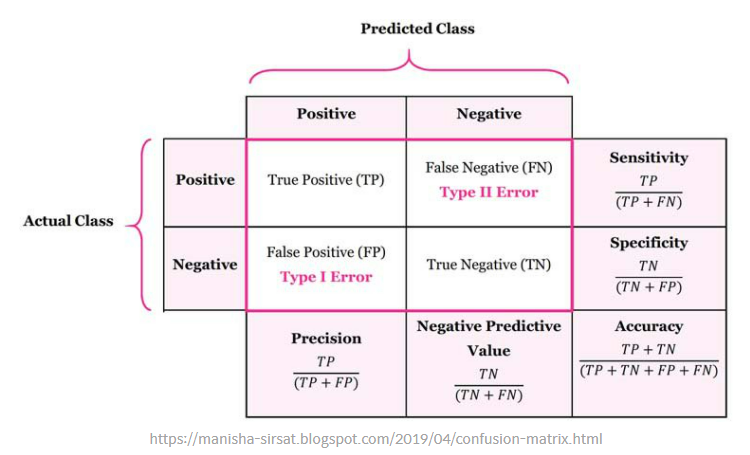<br>
<br>
- 그림에서 알 수 있듯이, 오차 행렬은 4가지의 경우의 수로 나뉘고 있으며, 각각을 기반으로 총 5가지의 성능 지표를 도출하고 있다. Sensitivity(Recall), Precision, Negative Predictive Value, Specificity, Accuracy 가 바로 그것이다. 이 중 우리는 앞서 살펴보았던 것처럼, 확진자(Positive)를 음성(Negative)로 오진하는 경우를 줄여나가야 한다. 그렇다면 (2, 2) shape 행렬의 각 칸 중에서 [0][1] 인덱스에 해당하는 FN(False Negative) 를 줄여야 한다는 사실을 알 수 있다. 이어서, 이러한 FN 이 영향을 미치는 성능 지표는 5가지 중에서 Sensitivity(Recall)가 될 것이고 결국 해당 지표의 값이 높은 모델이 더욱 좋은 성능을 내는 모델이라고 볼 수 있다. 
<br>
<br>
- 우리는 위에서 accuracy 이외에도 '오차 행렬'을 통해 모델의 성능을 측정하는 다양한 성능 지표가 존재함을 확인하였다. 오차 행렬의 5가지 성능 지표 중 각 문제 상황의 특성에 따라 더 중요하게 보아야할 지표를 판단하는 과정은 이번 프로젝트에서 핵심적인 내용이었다.
***

**(3)**  **아직 모호한 점**
<br>
<br>
- 프로젝트가 끝나고도 아직 모호한 점이 있다면, 각 모델의 세부적인 작동 원리일 것이다. 물론 이러한 내용들은 내가 앞으로 꾸준히 학습하면서 깨우쳐가야할 대상이자 목표라 생각한다. 따라서, 성급하게 생각할 필요없이 천천히 각 모델들의 원리를 공부해나갈 생각으로 접근했다. 그 중 의사결정 트리와 랜덤 포레스트는 처음 접근할 때 SVM 보다는 장벽이 낮았다. 세부적인 내용으로 들어갈수록 복잡한 수식들과 원리들이 난무하겠지만, 직관적으로 모델의 학습과정을 파악하는 데는 비교적 다른 모델들보다 용이했다는 의미이다. 의사결정 트리는 데이터들을 각각의 특징을 기준으로 이진 분류해나간다. 두 개의 클래스로 수직적 분류되면서, 하위에 또 다른 기준으로 데이터들을 이진 분류한다. 그렇게 과정을 반복해나간다. 이런 방식으로 나누어진 각각의 클래스 안에는 유사한 특징을 가진 데이터들로 모여있게 될 것이며, 각각의 클래스에 속한 데이터들을 모두 합하면 처음의 데이터와 같다. 이는 각 기준들에 의해 분류된 데이터들은 교집합이 없다는 의미이다. 또한, 클래스 안의 데이터들에 대해 그 순도를 확인하여 올바르게 분류되고 있는지 확인하기도 한다. 결국, 이렇게 각각의 기준들에 의해 이진 분류된 클래스와 데이터들의 모양을 거꾸로 뒤집으면 나무와 같은 모양이 될것이고, 이것이 의사결정 트리라는 이름이 붙은 이유이다. 
<br>
<br>
- 하지만, 의사결정 트리의 특징, 즉 결정경계 혹은 가지가 많아지면 많아질수록, 해당 data 에 overfitting 되어 새로운 데이터에 대해 좋은 성능을 보여주지 못할 가능성이 높다. 이러한 문제점을 해결하기 위해 등장한 것이 바로 '앙상블 기법', 랜덤 포레스트이다. 이름만 들어도 나무가 모여 있는 것같은 이름인데, 실제로 의사결정 트리의 결정경계 수를 계속해서 늘려나가는 방법이 아닌, 작은 의사결정 트리를 여러개 만들어내는 방식으로 동작한다. 의사결정 트리 한 개를 사용할 때 발생할 수 있는 문제점을 여러 개의 작은 의사결정 트리를 만들어냄으로서 극복해낸 것이다. 이렇게 여러 개의 작은 의사결정 트리에서 나온 결과값을 활용할 때는, Classification 문제에서는 최빈값으로, Regression 문제에서는 평균으로 하여 결과를 도출한다. 데이터 사이언스에서는 랜덤 포레스트와 같이 여러 의견을 고려하여 통합해 결과를 도출하는 방식을 '앙상블(Ensemble)'이라고 한다.
<br>
<br>
- SVM 은 선형 SVM 과 커널 SVM 으로 나뉘는데, 개념에 접근하기 굉장히 어려운 모델이었다. 2차원 공간에서 2개의 클래스를 선형 SVM 으로 분류하게 될 때, SVM 은 각 클래스의 데이터를 가장 잘 구분해낼 수 있는 선을 긋게 되고, 이는 결정 경계라 부른다. 즉 이러한 결정 경계와 각 데이터간 거리인 margin 이 크면 클수록, 새로운 데이터가 입력되었을 때, 더 뚜렷하게 분류할 수 있어 좋은 성능을 보여준다. 이름의 SV 는 Support Vector 를 의미하는데, 이는 결정경계와 가장 가까이 붙어있는 데이터를 의미하고 이러한 데이터에 의해 결정경계는 큰 영향을 받게 되므로, 결정경계를 지지하고 있는 것과 같다해서 Support Vector 라 부른다. 결국, SVM 모델은 margin 을 키워 cost 를 줄여나가며 데이터들을 가장 뚜렷하게 분류해낼 수 있는 경계선을 찾아가는 과정으로 학습하는 것이다. 하지만 이러한 SVM 은 한계점이 존재한다. 현실의 대부분의 데이터들은 이렇게 선 하나로 뚜렷하게 분류될 수 있을 정도로 선형적이지 않다는 것이다. 예를 들어, 하나의 클래스에 속한 데이터들이 원형으로 군집화 되어있고, 다른 클래스로 분류되어야 하는 데이터들이 이 데이터들을 다시 원형으로 감싸고 있다고 생각해보자.(물론, 굳이 이러한 형태가 아니더라도 선 하나로 뚜렷하게 구분해낼 수 없는 상황이 많을 것이다.) 이 경우에서 두 클래스의 데이터들을 높은 성능으로 구분해주는 선을 찾아내기란 컴퓨터에게도 어려운 일이 될 것이다. 따라서, 이렇게 선형적이지 않은 데이터들을 구분해내기 위해 우리는 2차원의 공간을 3차원이상의 고차원의 공간으로 매핑해주며, kernel SVM(커널 SVM) 중 가우시안 정규분포를 따르는 RBF Kernel SVM을 주로 사용하게 된다. 이제 위에서 살펴보았던 경우로 돌아가 하나의 클래스가 다른 클래스의 데이터들에 의해 원형으로 둘러쌓여 있다고 가정해보자. 좌표 평면 위에 이러한 데이터들의 분포를 3 차원으로 표현하게 되면(그림이 없어 이해가 힘들겠지만), 우리는 정규분포의 종모양 그래프를 활용해 파라미터값을 조정해가면서 둥글게 쌓여진 내부의 데이터들만을 선택할 수 있게 될 것이다. 가장자리의 테두리를 따라 감싸고 있는 다른 클래스의 데이터들은 제외하고 말이다. 이렇게 되면, 이 데이터 분포는 선형성을 띄게 되고 우리는 각 클래스의 데이터들을 분류해낼 수 있다. 이를 Linearly separable 하게 만든다고 이야기한다. 다만 이렇게 되면, 3차원의 공간에서 정규분포의 곡률을 조정하여 Linearly 해진 데이터들을 분리해야 하기 때문에 각 클래스를 나눌 때 선을 사용할 수 없게 되며, 평면을 사용하게 된다. 그리고 이를 더이상 결정 경계가 아닌, '분리 초평면'이라 칭한다. 결론적으로, 각 클래스를 뚜렷하게 구분해내는 분리초평면을 찾아내면서 학습해가는 것이다. 여기까지가 내가 SVM 에 대해 이해한 내용이다.
<br>
<br>
- 이번 프로젝트에서 사용한 모델은 위에서 설명한 모델들 이외에 SGD Classifier 와 로지스틱 회귀의 두 가지 모델이 남았다. 이 두가지 모델들에 대해서는 더 학습을 한 후에 어느 정도 정리가 되면 다음 프로젝트의 회고에서 설명해보려 한다. 비록 지금은 모호한 점이 많고, 헷갈리는 개념도 많은 모델들이다. 위에서 설명한 모델들도 더욱 깊게 파고들어가면, 굉장히 복잡하고 어려운 모델들일 것이다. 하지만, 성급해할 필요는 없다고 생각한다. 이렇게 프로젝트를 완성해나가며, 차근차근 학습해나가다보면 어느샌가, 다섯가지 모델들에 대해 정확히 이해하고 각 문제 상황 별로 유리한 모델들을 선정해나갈 수 있는 힘이 생기게 될 것이라 믿는다. 그때까지 위 다섯가지 모델들은 앞으로도 모호한 점으로 남아있을 것 같다. 다음 프로젝트부터는 다섯 가지 모델들에 대해서 학습해가며 알게된 원리와 개념들을 확실히 정리하며 넘어갈 수 있도록 해야겠다.